In [2]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
import sklearn

consensus score: 1.000


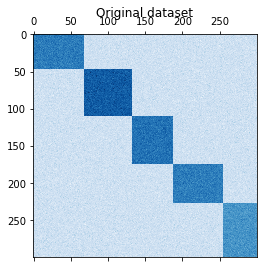

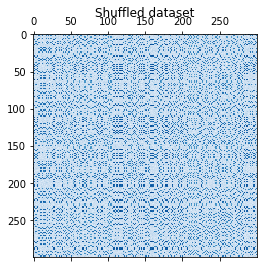

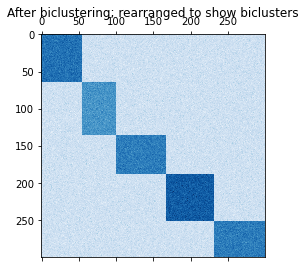

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

In [4]:
import pandas as pd
data = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\6.1.21_tSNE_with_descriptions.csv")
D_names = data[["D_Name","Disease code"]]
del [data["Group_Description"],data["Study_Name"],data["D_Name"]]

data["Study"] = data["Study"].astype("category")
data["Disease code"] = data["Disease code"].astype("category")
data["Group"] = data["Group"].astype("category")
print(data)
print(data.info())
tsne_data = data.pivot_table('Weight', ["Disease code"], 'Group',fill_value=0.0)
tsne_data

                 Disease code  Weight          Group        Study
0                     D009026    4.17  NCT00090545-2  NCT00090545
1                     D064420    9.09  NCT00090545-1  NCT00090545
2                     D064420   25.00  NCT00090545-2  NCT00090545
3                     D003248    4.17  NCT00090545-2  NCT00090545
4                     D003681    4.17  NCT00090545-2  NCT00090545
...                       ...     ...            ...          ...
18657                 D004761   11.11  NCT03135028-1  NCT03135028
18658              D000069544   11.11  NCT03135028-1  NCT03135028
18659                 D011014   11.11  NCT03135028-1  NCT03135028
18660  UNKNOWN-check-for-typo   11.11  NCT03135028-1  NCT03135028
18661                 D003920   11.11  NCT03135028-1  NCT03135028

[18662 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18662 entries, 0 to 18661
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        -----------

Group                   NCT00003896-1  NCT00005908-1  NCT00006184-1  \
Disease code                                                          
10000060                          0.0           0.00            0.0   
10000636                          0.0           0.00            0.0   
10001497                          0.0           0.00            0.0   
10001551                          0.0           0.00            0.0   
10001675                          0.0           0.00            0.0   
...                               ...            ...            ...   
D065227                           0.0           0.00            0.0   
D065467                           0.0           0.00            0.0   
D065631                           0.0           0.00            0.0   
D065634                           0.0           0.00            0.0   
UNKNOWN-check-for-typo            0.0           3.33            0.0   

Group                   NCT00006721-2  NCT00006721-3  NCT00011986-1  \
Disease code                                                          
10000060                          0.0            0.0            0.0   
10000636                          0.0            0.0            0.0   
10001497                          0.0            0.0            0.0   
10001551                          0.0            0.0            0.0   
10001675                          0.0            0.0            0.0   
...                               ...            ...            ...   
D065227                           0.0            0.0            0.0   
D065467                           0.0            0.0            0.0   
D065631                           0.0            0.0            0.0   
D065634                           0.0            0.0            0.0   
UNKNOWN-check-for-typo            0.0            0.0            0.0   

Group                   NCT00011986-2  NCT00011986-3  NCT00011986-4  \
Disease code                                                          
10000060                         0.00            0.0            0.0   
10000636                         0.00            0.0            0.0   
10001497                         0.00            0.0            0.0   
10001551                         0.00            0.0            0.0   
10001675                         0.00            0.0            0.0   
...                               ...            ...            ...   
D065227                          0.00            0.0            0.0   
D065467                          0.00            0.0            0.0   
D065631                          0.00            0.0            0.0   
D065634                          0.00            0.0            0.0   
UNKNOWN-check-for-typo           0.13            0.0            0.0   

Group                   NCT00011986-5  ...  NCT03003520-1  NCT03003520-2  \
Disease code                           ...                                 
10000060                          0.0  ...           0.00            0.0   
10000636                          0.0  ...           0.00            0.0   
10001497                          0.0  ...           0.00            0.0   
10001551                          0.0  ...           0.00            0.0   
10001675                          0.0  ...           0.00            0.0   
...                               ...  ...            ...            ...   
D065227                           0.0  ...           0.00            0.0   
D065467                           0.0  ...           0.00            0.0   
D065631                           0.0  ...           0.00            0.0   
D065634                           0.0  ...           0.00            0.0   
UNKNOWN-check-for-typo            0.0  ...           2.33            0.0   

Group                   NCT03023878-1  NCT03135028-1  NCT03211117-1  \
Disease code                                                          
10000060                         0.00           0.00            0.0   
10000636                  

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(tsne_data)

In [6]:
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.cluster.bicluster import SpectralBiclustering

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
model = SpectralBiclustering(n_clusters=60, random_state=0,method="log")
model.fit(scaled_samples)

SpectralBiclustering(method='log', n_clusters=60, random_state=0)

<ipython-input-8-58128d0242ec>:4: RuntimeWarning: invalid value encountered in power
  plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1)


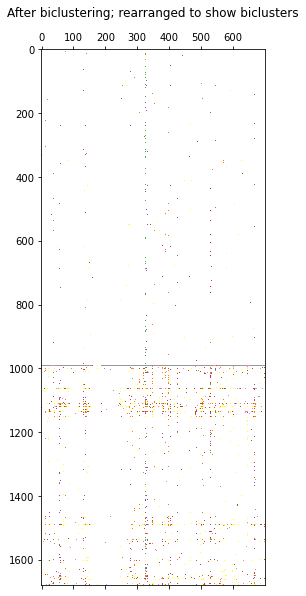

In [8]:
fit_data = scaled_samples[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

In [18]:
fit_data

array([[-0.0592588 , -0.06047305, -0.05985056, ..., -0.08473272,
        -0.09603888, -0.06918544],
       [-0.0592588 , -0.06047305, -0.05985056, ..., -0.08473272,
        -0.09603888, -0.06918544],
       [-0.0592588 , -0.06047305, -0.05985056, ..., -0.08473272,
        -0.09603888, -0.06918544],
       ...,
       [-0.0592588 , -0.06047305, -0.05985056, ..., -0.08473272,
        -0.09603888, -0.06918544],
       [-0.0592588 , -0.06047305, -0.05985056, ..., -0.08473272,
        -0.09603888, -0.06918544],
       [-0.0592588 , -0.06047305, -0.05985056, ..., -0.08473272,
        -0.09603888, -0.06918544]])

In [19]:
scaled_samples

array([[-0.05180891, -0.07489557, -0.07047355, ..., -0.06169214,
        -0.05435149, -0.05539784],
       [-0.05180891, -0.07489557, -0.07047355, ..., -0.06169214,
        -0.05435149, -0.05539784],
       [-0.05180891, -0.07489557, -0.07047355, ..., -0.06169214,
        -0.05435149, -0.05539784],
       ...,
       [-0.05180891, -0.07489557, -0.07047355, ..., -0.06169214,
        -0.05435149, -0.05539784],
       [-0.05180891, -0.07489557, -0.07047355, ..., -0.06169214,
        -0.05435149, -0.05539784],
       [-0.05180891,  0.85001876, -0.07047355, ..., -0.06169214,
         1.11275796,  0.91920995]])

In [78]:
model.row_labels_

array([ 0, 37, 40, ..., 16,  0, 48])

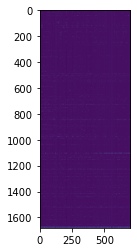

In [89]:
plt.imshow(np.log(scaled_samples+1))

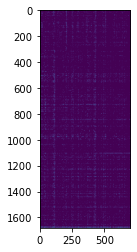

In [91]:
plt.imshow(np.power(tsne_data, 0.01))

In [1]:
tsne_data.sum().sum()

NameError: name 'tsne_data' is not defined

In [20]:
tsne_data

Group                   NCT00003896-1  NCT00005908-1  NCT00006184-1  \
Disease code                                                          
10000060                          0.0           0.00            0.0   
10000636                          0.0           0.00            0.0   
10001497                          0.0           0.00            0.0   
10001551                          0.0           0.00            0.0   
10001675                          0.0           0.00            0.0   
...                               ...            ...            ...   
D065227                           0.0           0.00            0.0   
D065467                           0.0           0.00            0.0   
D065631                           0.0           0.00            0.0   
D065634                           0.0           0.00            0.0   
UNKNOWN-check-for-typo            0.0           3.33            0.0   

Group                   NCT00006721-2  NCT00006721-3  NCT00011986-1  \
Disease code                                                          
10000060                          0.0            0.0            0.0   
10000636                          0.0            0.0            0.0   
10001497                          0.0            0.0            0.0   
10001551                          0.0            0.0            0.0   
10001675                          0.0            0.0            0.0   
...                               ...            ...            ...   
D065227                           0.0            0.0            0.0   
D065467                           0.0            0.0            0.0   
D065631                           0.0            0.0            0.0   
D065634                           0.0            0.0            0.0   
UNKNOWN-check-for-typo            0.0            0.0            0.0   

Group                   NCT00011986-2  NCT00011986-3  NCT00011986-4  \
Disease code                                                          
10000060                         0.00            0.0            0.0   
10000636                         0.00            0.0            0.0   
10001497                         0.00            0.0            0.0   
10001551                         0.00            0.0            0.0   
10001675                         0.00            0.0            0.0   
...                               ...            ...            ...   
D065227                          0.00            0.0            0.0   
D065467                          0.00            0.0            0.0   
D065631                          0.00            0.0            0.0   
D065634                          0.00            0.0            0.0   
UNKNOWN-check-for-typo           0.13            0.0            0.0   

Group                   NCT00011986-5  ...  NCT03003520-1  NCT03003520-2  \
Disease code                           ...                                 
10000060                          0.0  ...           0.00            0.0   
10000636                          0.0  ...           0.00            0.0   
10001497                          0.0  ...           0.00            0.0   
10001551                          0.0  ...           0.00            0.0   
10001675                          0.0  ...           0.00            0.0   
...                               ...  ...            ...            ...   
D065227                           0.0  ...           0.00            0.0   
D065467                           0.0  ...           0.00            0.0   
D065631                           0.0  ...           0.00            0.0   
D065634                           0.0  ...           0.00            0.0   
UNKNOWN-check-for-typo            0.0  ...           2.33            0.0   

Group                   NCT03023878-1  NCT03135028-1  NCT03211117-1  \
Disease code                                                          
10000060                         0.00           0.00            0.0   
10000636                  

In [8]:
np.argsort(model.row_labels_)

array([560, 714, 715, ..., 766, 691, 555], dtype=int64)

In [9]:
np.argsort(model.column_labels_)

array([541, 513, 563, 567, 471, 393, 628, 244, 195,  35, 233, 371, 403,
       193,  63, 441, 610, 595, 594,  78, 116, 245, 349, 214,  11, 246,
         8,   7,   5, 284,   6, 300, 579, 630, 295, 688, 531, 535, 276,
       428, 414, 580,  45, 313, 650, 510, 460, 667, 225, 451, 600, 653,
       385, 369, 235, 368, 169, 492, 367, 366, 250, 101, 102, 103, 130,
       489, 450, 248, 410, 418, 269, 232, 449, 220, 417, 347, 436, 255,
       386, 674,  37, 254, 644, 370, 523, 651, 587, 355, 658, 475, 162,
       126, 128, 185, 184, 435, 365, 135, 182, 289, 264, 434, 509, 499,
       219, 158, 420, 141, 183, 293,  23,  80,  59,  61,  76,  53, 619,
       696, 539, 618, 617,  97, 668, 691, 345, 178, 642, 323,  25, 151,
       324, 325, 180,  89, 181,  91, 197, 281,  99, 411, 218, 113, 108,
       212,  55, 311, 350, 302, 377, 376, 109, 478, 310,  24, 378, 683,
       409, 675, 537, 122, 363, 437, 462, 247, 199, 593, 615, 551, 121,
       555, 554, 553, 514, 556, 557, 684, 120, 503, 687, 494, 49

In [10]:
fit_data[0][0]

-0.05925880404934418

In [11]:
scaled_samples[560][541]

-0.05925880404934418

In [12]:
np.argsort(model.row_labels_)[1075:1161]

array([1252,  952,   99,  850,  229,  981,   66, 1250,  946,  154, 1553,
        930,  921,  840,   42, 1520,  979,  614,  621, 1184, 1036,  627,
       1358,  394,  320,  679,  863,  703,  939,  991,  500, 1231,  764,
       1039, 1133,  978,  846, 1435,  492, 1311,  548,  512,  724,  202,
        965,  881, 1680,  248,  114,   16,    0, 1471,  990, 1183,  465,
       1449,  847,  920,  658, 1602,  755, 1415,   93,  976,  915,  889,
        361, 1432,  105,  219,  309, 1373,  118, 1623,  712,  958, 1038,
       1355, 1242,  152, 1414,  174,  528,  711,  854,  218], dtype=int64)

In [86]:
np.argsort(model.column_labels_)[240:445]

array([530,  65, 124, 597, 526,  13, 278, 337, 519, 598, 573, 525,  96,
        98, 534, 677, 168, 167, 353,  26, 433,  19, 671, 461, 586, 515,
       648, 532, 419, 649, 415, 623, 693, 621, 641, 438, 413, 661, 294,
       611, 457, 578, 574, 660, 423, 507, 488, 487, 695, 480, 544, 698,
       699, 155, 156, 230,  15,  16, 123,  49,  32, 282, 422, 528, 689,
       672,  42,  39, 357, 518, 664, 210, 439, 547, 564, 512, 511, 391,
        12,  67, 483, 482, 571, 152, 638, 312, 112, 115, 258, 243, 131,
       502, 380, 387, 105, 359,  85, 344, 379, 569, 242, 570, 343,   0,
        71, 421, 412,  17,  18, 187, 216, 217, 314, 315, 316,  74, 179,
       652, 321, 272, 327, 171,  70, 453, 398, 177, 176, 400, 397, 223,
       390, 442, 194,  95,  36, 647, 659, 298, 249, 354, 270, 334, 351,
        83, 285, 274, 309,  20, 447, 336, 445, 207, 226, 506, 590, 686,
       565, 542,  40, 524, 516, 466, 196, 613, 500, 474, 303, 446, 676,
       140,  50, 139, 267, 228, 469,  62, 607, 606, 584, 694, 63

In [9]:
groups = tsne_data.iloc[:,list(np.argsort(model.column_labels_)[240:446])].columns

In [10]:
tsne_data.iloc[:,[0,2]]

Group                   NCT00003896-1  NCT00006184-1
Disease code                                        
10000060                          0.0            0.0
10000636                          0.0            0.0
10001497                          0.0            0.0
10001551                          0.0            0.0
10001675                          0.0            0.0
...                               ...            ...
D065227                           0.0            0.0
D065467                           0.0            0.0
D065631                           0.0            0.0
D065634                           0.0            0.0
UNKNOWN-check-for-typo            0.0            0.0

[1681 rows x 2 columns]

In [11]:
contiditions = tsne_data.iloc[np.argsort(model.row_labels_)[1075:1161]].index

In [12]:
pd.set_option("display.max_row", None)
data = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\6.1.21_tSNE_with_descriptions.csv")
D_names = data[["D_Name","Disease code"]]
D_names=D_names.drop_duplicates("Disease code").sort_values("Disease code")
D_names[D_names["Disease code"].isin(contiditions)]

D_Name  \
71                                 abdominal distension   
108                           blood bilirubin increased   
19                                            death nos   
1816                                           fracture   
379         infections and infestations - other specify   
13                             ischemia cerebrovascular   
67                                     lipase increased   
84                                       mucositis oral   
1868  neoplasms benign malignant and unspecified (in...   
2718        renal and urinary disorders - other specify   
940   respiratory thoracic and mediastinal disorders...   
8882    surgical and medical procedures - other specify   
448              treatment related secondary malignancy   
348                                          neck edema   
36           palmar-plantar erythrodysesthesia syndrome   
578                   upper gastrointestinal hemorrhage   
7                                        lung infection   
210               left ventricular systolic dysfunction   
728                                             abscess   
218                              encephalitis infection   
201                    mental status and dementia tests   
3196                                               mood   
652                                    aplastic anaemia   
710                                          angioedema   
2063                                         antisepsis   
3882                             arrhythmias sinoatrial   
286                                 atrial fibrillation   
730                                          bronchitis   
1103                                 c-reactive protein   
2395                                        candidiasis   
1502               intracranial embolism and thrombosis   
4316                    clostridium difficile infection   
960                           coronary arteriosclerosis   
5151                                myxedema congenital   
4114  familial nonhemolytic unconjugated hyperbiliru...   
5                                                 death   
165                                     diet low-sodium   
1060                                     diverticulitis   
20                                              fatigue   
94                                                fever   
1550                               unknown origin fever   
5926                                             fibula   
148                                            flushing   
316                                           gastritis   
518                                        granulocytes   
14                                             headache   
8                                            hemoglobin   
149                                          hemorrhage   
187                         gastrointestinal hemorrhage   
1694                           hepatocellular carcinoma   
736                                       herpes zoster   
6817                                    hospitalization   
1319                                 hyperbilirubinemia   
417                                        hyperkalemia   
15                                         hypertension   
29                                         hyponatremia   
16                                          hypotension   
1482                            orthostatic hypotension   
70                                       hypothyroidism   
556                                           infection   
1037                                       inflammation   
1731                                       leukocytosis   
1215                                         leukopenia   
1426                                   decreased libido   
85                                               nausea   
62                                         pancreatitis   
585                                        pancytopenia   
744                    pneumocystis j

In [13]:
trials = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\6.1.21_tSNE_with_descriptions.csv")
trials= trials[["Study_Name","Group","Group_Description"]]
trials = trials.drop_duplicates("Group")

desc = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\05-01-Sorafenib_Doxorubicine_Cytarabine_node_descriptions.csv")
desc =  desc.rename(columns = {"Unnamed: 0":"Study"})
desc = desc.dropna()
desc = desc[desc["Study"].isin(tsne_data.columns)]
groups_det = trials.merge(desc,left_on='Group', right_on='Study')

In [14]:
bicluster = groups_det[groups_det["Group"].isin(groups)]
bicluster["descriptions"] = bicluster["descriptions"].str.lower()
bicluster["title"] = bicluster["title"].str.lower()
bicluster=bicluster.reset_index()

<ipython-input-14-9ab6cc068276>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicluster["descriptions"] = bicluster["descriptions"].str.lower()
<ipython-input-14-9ab6cc068276>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicluster["title"] = bicluster["title"].str.lower()


In [15]:
drugs = ["sorafenib", "doxorubicin", "cytarabine",'mk-8242','rituximab','trastuzumab','docetaxel','polatuzumab','glasdegib',
         'nintedanib','ofatumumab','cyclophosphamide','olaratumab','vincristine','amg 531','nivolumab','brentuximab','adriamycin',
         'venetoclax','paclitaxel',"hidac",'sunitinib','bortezomib','gti-2040','rad001','cisplatin','dexamethasone','thalidomide','pazopanib',
        "capecitabine"]

dict_count = {}
found_drug = []
for group in range(bicluster.shape[0]):
    for drug in drugs:
        if drug in bicluster.loc[group,"descriptions"] or drug in bicluster.loc[group,"title"]:
            found_drug.append(drug)
        bicluster.loc[group, 'color'] = " & ".join(found_drug)
    for found in found_drug:
        if found in dict_count:
            dict_count[found] += 1
        else:
            dict_count[found] = 1
    found_drug=[]
        
bicluster

index                                         Study_Name           Group  \
0        5  Sorafenib Tosylate With or Without Recombinant...   NCT00126594-1   
1        7  Sorafenib Tosylate in Treating Patients With P...   NCT00131911-1   
2        8  Sorafenib in Treating Patients With Extensive ...   NCT00182689-1   
3       11  S0505 Sorafenib in Treating Patients With Adva...   NCT00217620-1   
4       15  Sunitinib Malate or Sorafenib Tosylate in Trea...   NCT00326898-1   
5       27  Paclitaxel and Carboplatin With Or Without Sor...   NCT00390611-2   
6       29  Pemetrexed Disodium With or Without Sorafenib ...   NCT00454194-1   
7       38  Capecitabine and Cisplatin (XP)+Sorafenib in A...   NCT00565370-1   
8       43  Axitinib (AG 013736) As Second Line Therapy Fo...   NCT00678392-1   
9       44  Axitinib (AG 013736) As Second Line Therapy Fo...   NCT00678392-2   
10      46  Sorafenib in Treating Non-Smokers or Former Li...   NCT00754923-1   
11      52  Phase I/II Trial of Sorafenib Plus Ixabepilone...   NCT00825734-1   
12      53  Study of Sorafenib and Transarterial Chemoembo...   NCT00844883-1   
13      54  Randomized Phase 1/2 Open-Label Trial of PR104...   NCT00862082-1   
14      55  Randomized Phase 1/2 Open-Label Trial of PR104...   NCT00862082-2   
15      60  Axitinib (AG-013736) For the Treatment of Meta...   NCT00920816-1   
16      61  Axitinib (AG-013736) For the Treatment of Meta...   NCT00920816-2   
17      62  Axitinib (AG-013736) For the Treatment of Meta...   NCT00920816-3   
18      64  Study to Determine the Safety  Maximum Tolerat...   NCT00941863-1   
19      75  A Phase I / II Trial of Nintedanib in Asian He...   NCT00987935-7   
20      76  A Phase I / II Trial of Nintedanib in Asian He...   NCT00987935-8   
21      78  Sorafenib Tosylate With or Without Doxorubicin...   NCT01015833-1   
22      83  A Study of Ramucirumab (IMC-1121B) Drug Produc...   NCT01140347-1   
23      84  A Study of Ramucirumab (IMC-1121B) Drug Produc...   NCT01140347-2   
24      85  Sorafenib Dose Ramp-Up in Hepatocellular Carci...   NCT01203787-1   
25      86  Sorafenib Dose Ramp-Up in Hepatocellular Carci...   NCT01203787-2   
26      89  Phase III Trial Comparing Capecitabine in Comb...   NCT01234337-2   
27      90  Study of Mapatumumab in Combination With Soraf...   NCT01258608-1   
28      92      Sorafenib and TRC105 in Hepatocellular Cancer   NCT01306058-1   
29      98  Bortezomib and Sorafenib Tosylate in Treating ...   NCT01371981-6   
30     100  Sorafenib Plus Capecitabine (SorCape) in Previ...   NCT01471353-1   
31     101  MEDI-573 in Combination With SOC in Unresectab...   NCT01498952-1   
32     112  Efficacy Evaluation of TheraSphere to Treat In...   NCT01887717-2   
33     114  Efficacy  Safety  and Pharmacokinetic of MSC21...   NCT01988493-2   
34     116  Efficacy  Safety  and Pharmacokinetic of MSC21...   NCT01988493-4   
35     119  Sorafenib Tosylate in Treating Patients With D...   NCT02066181-1   
36     120  Sorafenib Tosylate in Treating Patients With D...   NCT02066181-2   
37     122         c-Met Second-Line Hepatocellular Carcinoma   NCT02115373-1   
38     127  S9912 Combination Chemo in Stage III Ovarian C...   NCT00003896-1   
39     139  Comparison of Combination Chemotherapy Regimen...   NCT00024102-3   
40     140  Combination Chemotherapy Plus Low-Dose Radiati...   NCT00026208-1   
41     142  Four Versus Six Cycles of Cyclophosphamide/Dox...   NCT00041119-1   
42     143  Four Versus Six Cycles of Cyclophosphamide/Dox...   NCT00041119-2   
43     144  Four Versus Six Cycles of Cyclophosphamide/Dox...   NCT00041119-3   
44     145  Four Versus Six Cycles of Cyclophosphamide/Dox...   NCT00041119-4   
45     146  Stem Cell Transplantation in Patients With Hig...   NCT00043979-1   
46     147  Vaccine and Chemotherapy for Previously Untrea...   NCT00048893-1   
47     150  Campath-1H and EPOCH to Treat Non-Hodgkin's T-...   NCT00069238-1   
48     155  S0221 Adjuvant Doxorubic

In [14]:
sorted(dict_count.items(), key=lambda x:-x[1])

[('doxorubicin', 70),
 ('cyclophosphamide', 45),
 ('cytarabine', 35),
 ('sorafenib', 24),
 ('paclitaxel', 24),
 ('vincristine', 23),
 ('rituximab', 18),
 ('trastuzumab', 10),
 ('docetaxel', 10),
 ('bortezomib', 6),
 ('olaratumab', 5),
 ('capecitabine', 4),
 ('mk-8242', 4),
 ('sunitinib', 3),
 ('nintedanib', 3),
 ('dexamethasone', 3),
 ('brentuximab', 3),
 ('venetoclax', 3),
 ('glasdegib', 3),
 ('thalidomide', 2),
 ('adriamycin', 2),
 ('pazopanib', 2),
 ('nivolumab', 2),
 ('cisplatin', 1),
 ('amg 531', 1),
 ('rad001', 1),
 ('polatuzumab', 1),
 ('hidac', 1),
 ('gti-2040', 1),
 ('ofatumumab', 1)]

In [17]:
groups2 = tsne_data.iloc[:,list(np.argsort(model.column_labels_)[105:161])].columns
bicluster = groups_det[groups_det["Group"].isin(groups2)]
bicluster["descriptions"] = bicluster["descriptions"].str.lower()
bicluster["title"] = bicluster["title"].str.lower()
bicluster=bicluster.reset_index()
bicluster

<ipython-input-17-c76bb9c9deb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicluster["descriptions"] = bicluster["descriptions"].str.lower()
<ipython-input-17-c76bb9c9deb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicluster["title"] = bicluster["title"].str.lower()


index                                         Study_Name          Group  \
0       2  BAY 43-9006 (Sorafenib) to Treat Relapsed Non-...  NCT00098254-1   
1       3  Sorafenib in Treating Patients With Advanced o...  NCT00112671-1   
2      12  Sorafenib With Either Temsirolimus or Tipifarn...  NCT00281957-1   
3      26  Paclitaxel and Carboplatin With Or Without Sor...  NCT00390611-1   
4      31  Temsirolimus Versus Sorafenib As Second-Line T...  NCT00474786-1   
5      32  Temsirolimus Versus Sorafenib As Second-Line T...  NCT00474786-2   
6      34  Sorafenib and Everolimus in Treating Patients ...  NCT00474929-2   
7      40  Sorafenib and Erlotinib or Sorafenib Alone in ...  NCT00609804-1   
8      58  A Study of IMC-A12 in Combination With Sorafen...  NCT00906373-2   
9      66  Study to Determine the Safety  Maximum Tolerat...  NCT00941863-3   
10     67  Study to Determine the Safety  Maximum Tolerat...  NCT00941863-4   
11     68  Study to Determine the Safety  Maximum Tolerat...  NCT00941863-5   
12     77  A Phase I / II Trial of Nintedanib in Asian He...  NCT00987935-9   
13     88  Phase III Trial Comparing Capecitabine in Comb...  NCT01234337-1   
14    106  Panobinostat and Everolimus in Treating Patien...  NCT01582009-1   
15    148  PS-341 Alone and PS-341 Plus EPOCH Chemotherap...  NCT00054665-1   
16    149  PS-341 Alone and PS-341 Plus EPOCH Chemotherap...  NCT00054665-2   
17    164  Study of DOXIL/CAELYX (Pegylated Liposomal Dox...  NCT00103506-1   
18    168  S0333 Combination Chemotherapy in Treating Pat...  NCT00109837-2   
19    177  Ixabepilone and Liposomal Doxorubicin in Advan...  NCT00182767-4   
20    191  Study of NGR-hTNF in Combination With Doxorubi...  NCT00305084-2   
21    194  Study of NGR-hTNF in Combination With Doxorubi...  NCT00305084-4   
22    195  Study of AVE0005 (VEGF Trap) in Patients With ...  NCT00327171-1   
23    196  Study of AVE0005 (VEGF Trap) in Patients With ...  NCT00327171-2   
24    215  Chemotherapy With or Without Bevacizumab in Tr...  NCT00408408-1   
25    239  Sunitinib and Chemoembolization in Treating Pa...  NCT00524316-1   
26    245  A Study to Determine the Activity of Robatumum...  NCT00617890-4   
27    265  Treatment With Pazopanib for Neoadjuvant Breas...  NCT00849472-1   
28    274  Bortezomib and Combination Chemotherapy in Tre...  NCT00873093-5   
29    280  A Study of Liposomal Doxorubicin With or Witho...  NCT00913835-1   
30    281  A Study of Liposomal Doxorubicin With or Witho...  NCT00913835-2   
31    297  Phase II Randomized Trial Evaluating Neoadjuva...  NCT01008150-2   
32    310  BI 6727 (Volasertib) Randomised Trial in Ovari...  NCT01121406-1   
33    311  BI 6727 (Volasertib) Randomised Trial in Ovari...  NCT01121406-2   
34    312  BI 6727 (Volasertib) Randomised Trial in Ovari...  NCT01121406-3   
35    336  Evaluation of an Anti-cancer Immunotherapy Com...  NCT01220128-6   
36    342  BIBF 1120 + Carboplatin/Pegylated Liposomal Do...  NCT01314105-1   
37    394  A Study of Polatuzumab Vedotin in Combination ...  NCT01992653-5   
38    398  A Study of Polatuzumab Vedotin in Combination ...  NCT01992653-2   
39    456  Brentuximab Vedotin Plus AD in Non-bulky Limit...  NCT02505269-1   
40    483  A Study of Olaratumab Alone and in Combination...  NCT02677116-8   
41    492  Genomic Based Assignment of Therapy in Advance...  NCT02788201-5   
42    496  A Study of Durvalumab in Combination With R-CH...  NCT03003520-2   
43    500  A Study of Olaratumab (LY3012207)  Doxorubicin...  NCT03283696-1   
44    506  Donor Stem Cell Transplant in Treating Patient...  NCT00054327-5   
45    521  Therapy for Pediatric Relapsed or Refractory A...  NCT00186875-2   
46    522  High-Dose Immunosuppression and Autologous Tra...  NCT00288626-1   
47    527  Safety and Efficacy of Imatinib Versus Interfe...  NCT00333840-2   
48    531  Etoposide  Methylprednisolone  High-dose Cytar...  NCT00336583-1   
49    541  Clofarabine and Cytarabine in Treating Youn

In [18]:
drugs = ["sorafenib", "doxorubicin", "cytarabine",'mk-8242','rituximab','trastuzumab','docetaxel','polatuzumab','glasdegib',
         'nintedanib','ofatumumab','cyclophosphamide','olaratumab','vincristine','amg 531','nivolumab','brentuximab','adriamycin',
         'venetoclax','paclitaxel',"hidac",'sunitinib','bortezomib','gti-2040','rad001','cisplatin','dexamethasone','thalidomide','pazopanib',
        "capecitabine"]

dict_count = {}
found_drug = []
for group in range(bicluster.shape[0]):
    for drug in drugs:
        if drug in bicluster.loc[group,"descriptions"] or drug in bicluster.loc[group,"title"]:
            found_drug.append(drug)
        bicluster.loc[group, 'color'] = " & ".join(found_drug)
    for found in found_drug:
        if found in dict_count:
            dict_count[found] += 1
        else:
            dict_count[found] = 1
    found_drug=[]
        
bicluster

index                                         Study_Name          Group  \
0       2  BAY 43-9006 (Sorafenib) to Treat Relapsed Non-...  NCT00098254-1   
1       3  Sorafenib in Treating Patients With Advanced o...  NCT00112671-1   
2      12  Sorafenib With Either Temsirolimus or Tipifarn...  NCT00281957-1   
3      26  Paclitaxel and Carboplatin With Or Without Sor...  NCT00390611-1   
4      31  Temsirolimus Versus Sorafenib As Second-Line T...  NCT00474786-1   
5      32  Temsirolimus Versus Sorafenib As Second-Line T...  NCT00474786-2   
6      34  Sorafenib and Everolimus in Treating Patients ...  NCT00474929-2   
7      40  Sorafenib and Erlotinib or Sorafenib Alone in ...  NCT00609804-1   
8      58  A Study of IMC-A12 in Combination With Sorafen...  NCT00906373-2   
9      66  Study to Determine the Safety  Maximum Tolerat...  NCT00941863-3   
10     67  Study to Determine the Safety  Maximum Tolerat...  NCT00941863-4   
11     68  Study to Determine the Safety  Maximum Tolerat...  NCT00941863-5   
12     77  A Phase I / II Trial of Nintedanib in Asian He...  NCT00987935-9   
13     88  Phase III Trial Comparing Capecitabine in Comb...  NCT01234337-1   
14    106  Panobinostat and Everolimus in Treating Patien...  NCT01582009-1   
15    148  PS-341 Alone and PS-341 Plus EPOCH Chemotherap...  NCT00054665-1   
16    149  PS-341 Alone and PS-341 Plus EPOCH Chemotherap...  NCT00054665-2   
17    164  Study of DOXIL/CAELYX (Pegylated Liposomal Dox...  NCT00103506-1   
18    168  S0333 Combination Chemotherapy in Treating Pat...  NCT00109837-2   
19    177  Ixabepilone and Liposomal Doxorubicin in Advan...  NCT00182767-4   
20    191  Study of NGR-hTNF in Combination With Doxorubi...  NCT00305084-2   
21    194  Study of NGR-hTNF in Combination With Doxorubi...  NCT00305084-4   
22    195  Study of AVE0005 (VEGF Trap) in Patients With ...  NCT00327171-1   
23    196  Study of AVE0005 (VEGF Trap) in Patients With ...  NCT00327171-2   
24    215  Chemotherapy With or Without Bevacizumab in Tr...  NCT00408408-1   
25    239  Sunitinib and Chemoembolization in Treating Pa...  NCT00524316-1   
26    245  A Study to Determine the Activity of Robatumum...  NCT00617890-4   
27    265  Treatment With Pazopanib for Neoadjuvant Breas...  NCT00849472-1   
28    274  Bortezomib and Combination Chemotherapy in Tre...  NCT00873093-5   
29    280  A Study of Liposomal Doxorubicin With or Witho...  NCT00913835-1   
30    281  A Study of Liposomal Doxorubicin With or Witho...  NCT00913835-2   
31    297  Phase II Randomized Trial Evaluating Neoadjuva...  NCT01008150-2   
32    310  BI 6727 (Volasertib) Randomised Trial in Ovari...  NCT01121406-1   
33    311  BI 6727 (Volasertib) Randomised Trial in Ovari...  NCT01121406-2   
34    312  BI 6727 (Volasertib) Randomised Trial in Ovari...  NCT01121406-3   
35    336  Evaluation of an Anti-cancer Immunotherapy Com...  NCT01220128-6   
36    342  BIBF 1120 + Carboplatin/Pegylated Liposomal Do...  NCT01314105-1   
37    394  A Study of Polatuzumab Vedotin in Combination ...  NCT01992653-5   
38    398  A Study of Polatuzumab Vedotin in Combination ...  NCT01992653-2   
39    456  Brentuximab Vedotin Plus AD in Non-bulky Limit...  NCT02505269-1   
40    483  A Study of Olaratumab Alone and in Combination...  NCT02677116-8   
41    492  Genomic Based Assignment of Therapy in Advance...  NCT02788201-5   
42    496  A Study of Durvalumab in Combination With R-CH...  NCT03003520-2   
43    500  A Study of Olaratumab (LY3012207)  Doxorubicin...  NCT03283696-1   
44    506  Donor Stem Cell Transplant in Treating Patient...  NCT00054327-5   
45    521  Therapy for Pediatric Relapsed or Refractory A...  NCT00186875-2   
46    522  High-Dose Immunosuppression and Autologous Tra...  NCT00288626-1   
47    527  Safety and Efficacy of Imatinib Versus Interfe...  NCT00333840-2   
48    531  Etoposide  Methylprednisolone  High-dose Cytar...  NCT00336583-1   
49    541  Clofarabine and Cytarabine in Treating Youn

In [19]:
sorted(dict_count.items(), key=lambda x:-x[1])

[('doxorubicin', 14),
 ('sorafenib', 13),
 ('cyclophosphamide', 7),
 ('cytarabine', 7),
 ('paclitaxel', 5),
 ('olaratumab', 4),
 ('vincristine', 3),
 ('bortezomib', 2),
 ('docetaxel', 2),
 ('trastuzumab', 2),
 ('polatuzumab', 2),
 ('rad001', 1),
 ('capecitabine', 1),
 ('sunitinib', 1),
 ('pazopanib', 1),
 ('nintedanib', 1),
 ('brentuximab', 1),
 ('adriamycin', 1),
 ('rituximab', 1)]

In [1]:
bicluster

NameError: name 'bicluster' is not defined

In [17]:
data = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\6.1.21_tSNE_with_descriptions.csv")
data= data[["Study_Name","Group","Group_Description"]]
data = data.drop_duplicates("Group")

desc = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\05-01-Sorafenib_Doxorubicine_Cytarabine_node_descriptions.csv")
desc =  desc.rename(columns = {"Unnamed: 0":"Study"})
desc = desc.dropna()
desc = desc[desc["Study"].isin(tsne_data.columns)]
data = data.merge(desc,left_on='Group', right_on='Study')
data = data.sort_values("Group")
data["descriptions"]=data["descriptions"].str.lower()
data["title"]=data["title"].str.lower()
data_with_3 = data[((data["descriptions"].str.contains("sorafenib")) | (data["title"].str.contains("sorafenib"))) |
     ((data["descriptions"].str.contains("doxorubicin")) | (data["title"].str.contains("doxorubicin"))) |
     ((data["descriptions"].str.contains("cytarabine")) | (data["title"].str.contains("cytarabine")))]
data_with_3 = data_with_3.reset_index(drop=True)

In [18]:

drugs = ["sorafenib", "doxorubicin", "cytarabine",'mk-8242','rituximab','trastuzumab','docetaxel','polatuzumab','glasdegib',
         'nintedanib','ofatumumab','cyclophosphamide','olaratumab','vincristine','amg 531','nivolumab','brentuximab','adriamycin',
         'venetoclax','paclitaxel',"hidac",'sunitinib','bortezomib','gti-2040','rad001','cisplatin','dexamethasone','thalidomide','pazopanib',
        "capecitabine"]

found_drug = []
for group in range(data_with_3.shape[0]):
    for drug in drugs:
        if drug in data_with_3.loc[group,"descriptions"] or drug in data_with_3.loc[group,"title"]:
            found_drug.append(drug)
        data_with_3.loc[group, 'color'] = " & ".join(found_drug)
    found_drug=[]
data_with_3

Study_Name           Group  \
0    S9912 Combination Chemo in Stage III Ovarian C...   NCT00003896-1   
1    Chemotherapy  Stem Cell Transplantation and Do...   NCT00006184-1   
2    S0016 Combination Chemotherapy With Monoclonal...   NCT00006721-2   
3    S0016 Combination Chemotherapy With Monoclonal...   NCT00006721-3   
4    Comparison of Combination Chemotherapy Regimen...   NCT00024102-2   
5    Combination Chemotherapy Plus Low-Dose Radiati...   NCT00026208-1   
6    Combination Chemotherapy Plus Low-Dose Radiati...   NCT00026208-2   
7    Four Versus Six Cycles of Cyclophosphamide/Dox...   NCT00041119-1   
8    Four Versus Six Cycles of Cyclophosphamide/Dox...   NCT00041119-2   
9    PS-341 Alone and PS-341 Plus EPOCH Chemotherap...   NCT00054665-2   
10   Campath-1H and EPOCH to Treat Non-Hodgkin's T-...   NCT00069238-1   
11   S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-1   
12   S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-2   
13   S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-3   
14   S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-4   
15   S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-5   
16   S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-6   
17   Surgery Plus Chemotherapy (Doxorubicin  Vincri...   NCT00071058-1   
18   A Survival Study in Patients With High Risk My...   NCT00071799-3   
19   A Survival Study in Patients With High Risk My...   NCT00071799-4   
20   Chemotherapy Before Autologous Stem Cell Trans...   NCT00078949-2   
21   BAY 43-9006 (Sorafenib) to Treat Relapsed Non-...   NCT00098254-1   
22   Universal Granulocyte Macrophage-colony Stimul...   NCT00101101-1   
23   Study of DOXIL/CAELYX (Pegylated Liposomal Dox...   NCT00103506-2   
24   S0433 Iodine I 131 Tositumomab  Rituximab  and...   NCT00107380-1   
25   Sorafenib in Treating Patients With Advanced o...   NCT00112671-1   
26   EPOCH-R Chemotherapy Plus Bortezomib to Treat ...   NCT00114738-1   
27   Sorafenib in Treating Patients With Advanced A...   NCT00126568-1   
28   Sorafenib Tosylate With or Without Recombinant...   NCT00126594-1   
29   Sorafenib Tosylate With or Without Recombinant...   NCT00126594-2   
30   Sorafenib Tosylate in Treating Patients With P...   NCT00131911-1   
31   Combination Chemotherapy and Rituximab in Trea...   NCT00133991-1   
32   Ixabepilone and Liposomal Doxorubicin in Advan...   NCT00182767-1   
33   Ixabepilone and Liposomal Doxorubicin in Advan...   NCT00182767-2   
34   Ixabepilone and Liposomal Doxorubicin in Advan...   NCT00182767-3   
35   Ixabepilone and Liposomal Doxorubicin in Advan...   NCT00182767-4   
36   Ixabepilone and Liposomal Doxorubicin in Advan...   NCT00182767-5   
37   Doxorubicin (Doxil) Combined With Rituxan  Cyc...   NCT00184002-1   
38   Primary Systemic Therapy in Operable/Locally A...   NCT00203502-1   
39   A Study of ONTAK and CHOP in Newly Diagnosed  ...   NCT00211185-1   
40   Sorafenib and Anastrozole in Treating Postmeno...   NCT00217399-1   
41   S0505 Sorafenib in Treating Patients With Adva...   NCT00217620-1   
42   Pyridoxine in Preventing Hand-Foot Syndrome in...   NCT00245050-1   
43   Pyridoxine in Preventing Hand-Foot Syndrome in...   NCT00245050-2   
44   Sorafenib With Either Temsirolimus or Tipifarn...   NCT00281957-1   
45   Sorafenib With Either Temsirolimus or Tipifarn...   NCT00281957-2   
46   High-Dose Immunosuppression and Autologous Tra...   NCT00288626-1   
47   Efficacy of the HCVIDDOXIL Regimen in Patients...   NCT00290433-1   
48   Study of Rituximab-HCVAD Alternating With Ritu...   NCT00290498-1   
49   Study of Rituximab-HCVAD Alternating With Ritu...   NCT00290498-2   
50   Study of NGR-hTNF in Combination With Doxorubi...   NCT00305084-1   
51   Study of NGR-hTNF in Combination With Doxorubi...   NCT00305084-2   
52   Study of NGR-hTNF in Combination With Doxorubi...   NCT00305084-3   
53   Study of NGR-hTNF in Combination With Doxor

In [19]:
data_with_3.sort_values("color").reset_index()

index                                         Study_Name           Group  \
0      379  Entospletinib Monotherapy and in Combination W...   NCT02343939-1   
1      138  BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-13   
2      139  BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-14   
3      140  BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-2   
4      141  BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-3   
5      142  BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-4   
6      143  BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-5   
7      144  BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-6   
8      145  BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-7   
9      146  BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-8   
10     147  BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-9   
11     381  Study of Ibrutinib in Subjects With Acute Myel...   NCT02351037-2   
12     380  Entospletinib Monotherapy and in Combination W...   NCT02343939-2   
13     322  Cytarabine and Daunorubicin Hydrochloride or I...   NCT01802333-2   
14     193  Chemosensitization With Plerixafor Plus G-CSF ...   NCT00906945-2   
15     194  Chemosensitization With Plerixafor Plus G-CSF ...   NCT00906945-4   
16     137  BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-12   
17     136  BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-11   
18     135  BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-10   
19     134  BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-1   
20      82  Combination Chemotherapy With or Without Gemtu...   NCT00372593-3   
21      83  Clofarabine and Cytarabine in Treating Young P...   NCT00372619-1   
22      84  Clofarabine and Cytarabine in Treating Young P...   NCT00372619-2   
23      85  Clofarabine and Cytarabine in Treating Young P...   NCT00372619-3   
24      86  Clofarabine and Cytarabine in Treating Young P...   NCT00372619-4   
25      87  Clofarabine and Cytarabine in Treating Young P...   NCT00372619-5   
26      88  Clofarabine and Cytarabine in Treating Young P...   NCT00372619-6   
27     195  Chemosensitization With Plerixafor Plus G-CSF ...   NCT00906945-5   
28      89  Clofarabine and Cytarabine in Treating Young P...   NCT00372619-7   
29     388  Study of Vosaroxin and Cytarabine for the Trea...   NCT02485353-1   
30     385  A Study of ASP2215 Versus Salvage Chemotherapy...   NCT02421939-2   
31     123  Cytosine Arabinoside and Mitoxantrone for Pati...   NCT00609739-1   
32     384  Study of CLAG + Selinexor in Relapsed or Refra...   NCT02416908-3   
33     383  Study of CLAG + Selinexor in Relapsed or Refra...   NCT02416908-2   
34     132  A Study of LY2181308 Sodium in Patients With R...   NCT00620321-2   
35     382  Study of CLAG + Selinexor in Relapsed or Refra...   NCT02416908-1   
36     391  Phase II Trial of Alisertib With Induction Che...   NCT02560025-1   
37     196  Chemosensitization With Plerixafor Plus G-CSF ...   NCT00906945-6   
38     197  Study of SCH 900776 (MK-8776) With and Without...   NCT00907517-3   
39     198  Study of SCH 900776 (MK-8776) With and Without...   NCT00907517-4   
40     273  Alvocidib  Cytarabine  and Mitoxantrone Hydroc...   NCT01349972-2   
41     274  Bortezomib and Sorafenib Tosylate in Treating ...   NCT01371981-1   
42     334  A Safety and Efficacy Study of Eltrombopag in ...   NCT01890746-2   
43     333  A Safety and Efficacy Study of Eltrombopag in ...   NCT01890746-1   
44     279  Bortezomib and Sorafenib Tosylate in Treating ...   NCT01371981-6   
45     288  Yttrium-90-labeled Daclizumab With Chemotherap...   NCT01468311-1   
46     328  A Study of Decitabine (DACOGEN) in Sequential ...   NCT01853228-2   
47     272  Alvocidib  Cytarabine  and Mitoxantrone Hydroc...   NCT01349972-1   
48     327  A Study of Decitabine (D

In [ ]:
"""0-123 cytarabine 
   124-331 doxorubicin 
   332-420 sorafenib"""

In [20]:
tsne_data.loc[:,list(data_with_3.sort_values("color")["Group"])]

Group                   NCT02343939-1  NCT00632749-13  NCT00632749-14  \
Disease code                                                            
10000060                         0.00            0.00            0.00   
10000636                         0.00            0.00            0.00   
10001497                         0.00            0.00            0.00   
10001551                         0.00            0.00            0.00   
10001675                         0.00            0.00            0.00   
10002167                         0.00            0.00            0.00   
10002899                         0.00            0.00            0.00   
10003012                         0.00            0.00            0.00   
10003481                         0.00            0.00            0.00   
10003504                         0.00            0.00            0.00   
10003673                         0.00            0.00            0.00   
10003674                         0.00            0.00            0.00   
10005047                         0.00            0.00            0.00   
10005265                         0.00            0.00            0.00   
10005329                         0.00            0.00            0.00   
10005359                         0.00            0.00            0.00   
10005364                         0.00            0.00            0.00   
10005630                         0.00            0.00            0.00   
10005778                         0.00            0.00            0.00   
10005886                         0.00            0.00            0.00   
10006002                         0.00            0.00            0.00   
10006259                         0.00            0.00            0.00   
10006440                         0.00            0.00            0.00   
10006504                         0.00            0.00            0.00   
10006556                         0.00            0.00            0.00   
10007541                         0.00            0.00            0.00   
10007612                         0.00            0.00            0.00   
10007613                         0.00            0.00            0.00   
10007810                         0.00            0.00            0.00   
10007839                         0.00            0.00            0.00   
10008481                         0.00            0.00            0.00   
10008496                         0.00            0.00            0.00   
10008661                         0.00            0.00            0.00   
10009845                         0.00            0.00            0.00   
10009998                         0.00            0.00            0.00   
10010000                         0.00            0.00            0.00   
10010001                         0.00            0.00            0.00   
10010004                         0.00            0.00            0.00   
10010276                         0.00            0.00            0.00   
10011268                         0.00            0.00            0.00   
10011368                         0.00            0.00            0.00   
10011655                         0.00            0.00            0.00   
10011914                         0.00            0.00            0.00   
10013781                         0.00            0.00            0.00   
10013786                         0.00            0.00            0.00   
10013832                         0.00            0.00            0.00   
10013993                         0.00            0.00            0.00   
10014020                         0.00            0.00            0.00   
10014217                         0.00            0.00            0.00   
10014222                         0.00            0.00            0.00   
10014383                         0.00            0.00            0.00   
10014621                         0.00            0.00            0.00   
10014678                         0.00            0.00     

In [21]:
drugs = tsne_data.loc[:,list(data_with_3.sort_values("color")["Group"])]

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(drugs)

In [23]:
model = SpectralBiclustering(n_clusters=60, random_state=0,method="log")
model.fit(scaled_samples)

SpectralBiclustering(method='log', n_clusters=60, random_state=0)

In [24]:
fit_data = scaled_samples[np.argsort(model.row_labels_)]
# fit_data = fit_data[:, model.column_labels_]

plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1)
plt.yticks(np.arange(0, 1650, 50))
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

<ipython-input-24-0ba2702327ac>:4: RuntimeWarning: invalid value encountered in power
  plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1)


In [25]:
groups = drugs.iloc[:,list(np.argsort(model.column_labels_)[150:175])].columns

In [26]:
bicluster = data_with_3[data_with_3["Group"].isin(groups)]
bicluster["descriptions"] = bicluster["descriptions"].str.lower()
bicluster["title"] = bicluster["title"].str.lower()
bicluster=bicluster.reset_index()

<ipython-input-26-2842a1667851>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicluster["descriptions"] = bicluster["descriptions"].str.lower()
<ipython-input-26-2842a1667851>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicluster["title"] = bicluster["title"].str.lower()


In [27]:
bicluster

index                                         Study_Name          Group  \
0      35  Ixabepilone and Liposomal Doxorubicin in Advan...  NCT00182767-4   
1      40  Sorafenib and Anastrozole in Treating Postmeno...  NCT00217399-1   
2      49  Study of Rituximab-HCVAD Alternating With Ritu...  NCT00290498-2   
3      58  Sunitinib Malate or Sorafenib Tosylate in Trea...  NCT00326898-2   
4     123  Cytosine Arabinoside and Mitoxantrone for Pati...  NCT00609739-1   
5     160  Bortezomib  Daunorubicin  and Cytarabine in Tr...  NCT00742625-1   
6     163  Study of Sorafenib/Cetuximab in Head and Neck ...  NCT00815295-1   
7     165  Study of Sorafenib/Cetuximab in Head and Neck ...  NCT00815295-3   
8     182  Trial of Neoadjuvant Conformal Radiotherapy Pl...  NCT00864032-2   
9     206  Pilot Study of Liposomal Doxorubicin Combined ...  NCT00923936-2   
10    209  Study to Determine the Safety  Maximum Tolerat...  NCT00941863-1   
11    210  Study to Determine the Safety  Maximum Tolerat...  NCT00941863-2   
12    227  Sorafenib Tosylate With or Without Doxorubicin...  NCT01015833-1   
13    228  Sorafenib Tosylate With or Without Doxorubicin...  NCT01015833-2   
14    232  Study of Pazopanib and Doxil in Patients With ...  NCT01035658-3   
15    233  Study of Pazopanib and Doxil in Patients With ...  NCT01035658-4   
16    275  Bortezomib and Sorafenib Tosylate in Treating ...  NCT01371981-2   
17    277  Bortezomib and Sorafenib Tosylate in Treating ...  NCT01371981-4   
18    278  Bortezomib and Sorafenib Tosylate in Treating ...  NCT01371981-5   
19    283  Phase 1 Trial of Siplizumab and Dose-Adjusted ...  NCT01445535-3   
20    292  Sorafenib for the Treatment of Chronic Lymphoc...  NCT01510756-1   
21    302  Decitabine Followed by Idarubicin and Cytarabi...  NCT01607645-2   
22    328  A Study of Decitabine (DACOGEN) in Sequential ...  NCT01853228-2   
23    362  Sorafenib Tosylate in Treating Patients With D...  NCT02066181-3   
24    393  Hormone Therapy Plus Chemotherapy as Initial T...  NCT02560051-2   

                                    Group_Description          Study  \
0   Ixabepilone 13mg/m2 and Doxorubicin 30mg/m2: L...  NCT00182767-4   
1                           Sorafenib and Anastrozole  NCT00217399-1   
2                                               RCHOP  NCT00290498-2   
3               Arm B (Sorafenib + Sunitinib Placebo)  NCT00326898-2   
4                           Cytarabine + Mitoxantrone  NCT00609739-1   
5              Bortezomib + Daunorubicin + Cytarabine  NCT00742625-1   
6                              Phase 1 - Dose Level 1  NCT00815295-1   
7                                             Phase 2  NCT00815295-3   
8                                   Sorafenib 200/400  NCT00864032-2   
9   All Other Advanced HIV-associated Kaposi's Sar...  NCT00923936-2   
10                    Sorafenib 100 mg (50-mg Tablet)  NCT00941863-1   
11                    Sorafenib 200 mg (50-mg Tablet)  NCT00941863-2   
12  Arm I (Doxorubicin Hydrochloride Sorafenib Tos...  NCT01015833-1   
13                        Arm II (Sorafenib Tosylate)  NCT01015833-2   
14                            Dose Level 1 Sequential  NCT01035658-3   
15                            Dose Level 2 Sequential  NCT01035658-4   
16                                              Arm B  NCT01371981-2   
17                                   Arm C (Cohort 2)  NCT01371981-4   
18                                   Arm C (Cohort 3)  NCT01371981-5   
19                               Cohort 3 - 8.5 mg/kg  NCT01445535-3   
20                                          Sorafenib  NCT01510756-1   
21  Arm II (Decitabine (Day -9 to Day -5) Idarubic...  NCT01607645-2   
22  Phase 1 (Cohort 2) and Phase 2: Dacogen + Cyta...  NCT01853228-2   
23                                    Crossover Group  NCT02066181-3   
24                         Nodal Only/Low-volume Bone  NCT02560051-2   

                                                title  \
0   ixabepilone 13m

In [28]:
contiditions = drugs.iloc[np.argsort(model.row_labels_)[1450:1550]].index

In [29]:
pd.set_option("display.max_row", None)
data = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\6.1.21_tSNE_with_descriptions.csv")
D_names = data[["D_Name","Disease code"]]
D_names=D_names.drop_duplicates("Disease code").sort_values("Disease code")
D_names[D_names["Disease code"].isin(contiditions)]

D_Name Disease code
23                  alkaline phosphatase increased     10001675
10                                       bone pain     10006002
109                           creatinine increased     10011368
1360                                   esophagitis     10015461
1084                                          fall     10016173
14226                                gingival pain     10018286
8260                                 gum infection     10018784
1830                         haptoglobin decreased     10019150
28                                  hypomagnesemia     10021028
379    infections and infestations - other specify     10021881
7417                                joint effusion     10023215
132                              pain in extremity     10033425
25                        platelet count decreased     10035528
850                            rash maculo-papular     10037868
756                                         sepsis     10040047
87                    small intestinal obstruction     10041101
1842                    white blood cell decreased     10049182
1828                   ejection fraction decreased     10050528
727                            abdominal infection     10056519
7                                   lung infection     10061229
167                    generalized muscle weakness     10062572
47                                         abdomen      D000005
201               mental status and dementia tests   D000073216
4103                           infertility clinics   D000080104
710                                     angioedema      D000799
116                                       anorexia      D000855
35                                         hypoxia      D000860
311                                 antidiarrheals      D000930
53                                         aphasia      D001037
73                                         ascites      D001201
747                               bronchopneumonia      D001996
11862                                 bronchoscopy      D001999
14691                                     gliporal      D002026
2228                     right bundle-branch block      D002037
4719                                      bursitis      D002062
191                                     chest pain      D002637
14681                                cholesteatoma      D002781
9200                               chorioretinitis      D002825
11086                                  chylothorax      D002916
7553                                      clavicle      D002968
7689                                   clostridium      D003013
467                               cluster headache      D003027
10166                   solitary pulmonary nodules      D003074
993                             ulcerative colitis      D003093
4831                     pseudoobstruction colonic      D003112
3116                                          coma      D003128
14609                         compartment syndrome      D003161
30                                       confusion      D003221
4281                         conjunctival diseases      D003229
3                                     constipation      D003248
2248                                      stenosis      D003251
12166                               contrast media      D003287
2867                                     contusion      D003288
14270                               astasia-abasia      D003291
33                                           cough      D003371
685                                      dysphagia      D003680
4215                     clostridium enterocolitis      D004761
833                                      epistaxis      D004844
1550                          unknown origin fever      D005335
316                                      gastritis      D005756
1062                               gastroenteritis      D005759
14                                        headache      D006261
660         

In [98]:
drugs = tsne_data.loc[:,list(data_with_3["Group"])]
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(drugs)
model = SpectralCoclustering(n_clusters=60, random_state=0)
model.fit(scaled_samples)
fit_data = scaled_samples[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1)
# plt.xticks(np.arange(0, 421, 25))
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

<ipython-input-98-5b8e93645d6c>:9: RuntimeWarning: invalid value encountered in power
  plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1)


In [116]:
tsne_data

Group                   NCT00003896-1  NCT00005908-1  NCT00006184-1  \
Disease code                                                          
10000060                          0.0           0.00            0.0   
10000636                          0.0           0.00            0.0   
10001497                          0.0           0.00            0.0   
10001551                          0.0           0.00            0.0   
10001675                          0.0           0.00            0.0   
...                               ...            ...            ...   
D065227                           0.0           0.00            0.0   
D065467                           0.0           0.00            0.0   
D065631                           0.0           0.00            0.0   
D065634                           0.0           0.00            0.0   
UNKNOWN-check-for-typo            0.0           3.33            0.0   

Group                   NCT00006721-2  NCT00006721-3  NCT00011986-1  \
Disease code                                                          
10000060                          0.0            0.0            0.0   
10000636                          0.0            0.0            0.0   
10001497                          0.0            0.0            0.0   
10001551                          0.0            0.0            0.0   
10001675                          0.0            0.0            0.0   
...                               ...            ...            ...   
D065227                           0.0            0.0            0.0   
D065467                           0.0            0.0            0.0   
D065631                           0.0            0.0            0.0   
D065634                           0.0            0.0            0.0   
UNKNOWN-check-for-typo            0.0            0.0            0.0   

Group                   NCT00011986-2  NCT00011986-3  NCT00011986-4  \
Disease code                                                          
10000060                         0.00            0.0            0.0   
10000636                         0.00            0.0            0.0   
10001497                         0.00            0.0            0.0   
10001551                         0.00            0.0            0.0   
10001675                         0.00            0.0            0.0   
...                               ...            ...            ...   
D065227                          0.00            0.0            0.0   
D065467                          0.00            0.0            0.0   
D065631                          0.00            0.0            0.0   
D065634                          0.00            0.0            0.0   
UNKNOWN-check-for-typo           0.13            0.0            0.0   

Group                   NCT00011986-5  ...  NCT03003520-1  NCT03003520-2  \
Disease code                           ...                                 
10000060                          0.0  ...           0.00            0.0   
10000636                          0.0  ...           0.00            0.0   
10001497                          0.0  ...           0.00            0.0   
10001551                          0.0  ...           0.00            0.0   
10001675                          0.0  ...           0.00            0.0   
...                               ...  ...            ...            ...   
D065227                           0.0  ...           0.00            0.0   
D065467                           0.0  ...           0.00            0.0   
D065631                           0.0  ...           0.00            0.0   
D065634                           0.0  ...           0.00            0.0   
UNKNOWN-check-for-typo            0.0  ...           2.33            0.0   

Group                   NCT03023878-1  NCT03135028-1  NCT03211117-1  \
Disease code                                                          
10000060                         0.00           0.00            0.0   
10000636                  

In [119]:
data_with_3.sort_values("color")

Study_Name           Group  \
379  Entospletinib Monotherapy and in Combination W...   NCT02343939-1   
138  BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-13   
139  BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-14   
140  BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-2   
141  BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-3   
..                                                 ...             ...   
108  Sorafenib and Everolimus in Treating Patients ...   NCT00474929-2   
57   Sunitinib Malate or Sorafenib Tosylate in Trea...   NCT00326898-1   
58   Sunitinib Malate or Sorafenib Tosylate in Trea...   NCT00326898-2   
59   Sunitinib Malate or Sorafenib Tosylate in Trea...   NCT00326898-3   
205  Axitinib (AG-013736) For the Treatment of Meta...   NCT00920816-4   

                                     Group_Description           Study  \
379  Group A Phase 1b ENTO 200 mg + Cytarabine + Da...   NCT02343939-1   
138  360 mg BI 811283 + 20 mg Cytarabine - Treatmen...  NCT00632749-13   
139  420 mg BI 811283 + 20 mg Cytarabine - Treatmen...  NCT00632749-14   
140  15 mg BI 811283 + 20 mg Cytarabine - Treatment...   NCT00632749-2   
141  30 mg BI 811283 + 20 mg Cytarabine - Treatment...   NCT00632749-3   
..                                                 ...             ...   
108                               Phase I Dose Level 1   NCT00474929-2   
57               Arm A (Sunitinib + Sorafenib Placebo)   NCT00326898-1   
58               Arm B (Sorafenib + Sunitinib Placebo)   NCT00326898-2   
59       Arm C (Sunitinib Placebo + Sorafenib Placebo)   NCT00326898-3   
205               Sorafenib (Second-line Participants)   NCT00920816-4   

                                                 title  \
379  group a phase 1b ento 200 mg + cytarabine + da...   
138  360 mg bi 811283 + 20 mg cytarabine - treatmen...   
139  420 mg bi 811283 + 20 mg cytarabine - treatmen...   
140  15 mg bi 811283 + 20 mg cytarabine - treatment...   
141  30 mg bi 811283 + 20 mg cytarabine - treatment...   
..                                                 ...   
108                               phase i dose level 1   
57               arm a (sunitinib + sorafenib placebo)   
58               arm b (sorafenib + sunitinib placebo)   
59       arm c (sunitinib placebo + sorafenib placebo)   
205               sorafenib (second-line participants)   

                                          descriptions                  color  
379  description: participants received ento 200 mg...             cytarabine  
138  description: 360 mg of bi 811283 (preconcentra...             cytarabine  
139  description: 420 mg of bi 811283 (preconcentra...             cytarabine  
140  description: 15 mg of bi 811283 (preconcentrat...             cytarabine  
141  description: 30 mg of bi 811283 (preconcentrat...             cytarabine  
..                                                 ...                    ...  
108  description: phase i: dose level 1: sorafenib ...     sorafenib & rad001  
57   description: beginning 4-12 weeks following ra...  sorafenib & sunitinib  
58   description: beginning 4-12 weeks following ra...  sorafenib & sunitinib  
59   description: beginning 4-12 weeks following ra...  sorafenib & sunitinib  
205  description: asian participants with prior sys...  sorafenib & sunitinib  

[421 rows x 7 columns]

In [118]:
tsne_data.loc[:,list(data_with_3.sort_values("color")["Group"])]

Group                   NCT02343939-1  NCT00632749-13  NCT00632749-14  \
Disease code                                                            
10000060                          0.0            0.00             0.0   
10000636                          0.0            0.00             0.0   
10001497                          0.0            0.00             0.0   
10001551                          0.0            0.00             0.0   
10001675                          0.0            0.00             0.0   
...                               ...             ...             ...   
D065227                           0.0            0.00             0.0   
D065467                           0.0            0.00             0.0   
D065631                           0.0            0.00             0.0   
D065634                           0.0            0.00             0.0   
UNKNOWN-check-for-typo            0.0           33.33             0.0   

Group                   NCT00632749-2  NCT00632749-3  NCT00632749-4  \
Disease code                                                          
10000060                          0.0            0.0              0   
10000636                          0.0            0.0              0   
10001497                          0.0            0.0              0   
10001551                          0.0            0.0              0   
10001675                          0.0            0.0              0   
...                               ...            ...            ...   
D065227                           0.0            0.0              0   
D065467                           0.0            0.0              0   
D065631                           0.0            0.0              0   
D065634                           0.0            0.0              0   
UNKNOWN-check-for-typo            0.0            0.0             25   

Group                   NCT00632749-5  NCT00632749-6  NCT00632749-7  \
Disease code                                                          
10000060                          0.0            0.0              0   
10000636                          0.0            0.0              0   
10001497                          0.0            0.0              0   
10001551                          0.0            0.0              0   
10001675                          0.0            0.0              0   
...                               ...            ...            ...   
D065227                           0.0            0.0              0   
D065467                           0.0            0.0              0   
D065631                           0.0            0.0              0   
D065634                           0.0            0.0              0   
UNKNOWN-check-for-typo            0.0            0.0              0   

Group                   NCT00632749-8  ...  NCT00390611-1  NCT00474929-3  \
Disease code                           ...                                 
10000060                            0  ...            0.0              0   
10000636                            0  ...            0.0              0   
10001497                            0  ...            0.0              0   
10001551                            0  ...            0.0              0   
10001675                            0  ...            0.0              0   
...                               ...  ...            ...            ...   
D065227                             0  ...            0.0              0   
D065467                             0  ...            0.0              0   
D065631                             0  ...            0.0              0   
D065634                             0  ...            0.0              0   
UNKNOWN-check-for-typo              0  ...            0.0              0   

Group                   NCT00474929-4  NCT00474929-5  NCT00474929-1  \
Disease code                                                          
10000060                            0            0.0            0.0   


In [45]:
drugs

Group                   NCT02343939-1  NCT00632749-13  NCT00632749-14  \
Disease code                                                            
10000060                         0.00            0.00            0.00   
10000636                         0.00            0.00            0.00   
10001497                         0.00            0.00            0.00   
10001551                         0.00            0.00            0.00   
10001675                         0.00            0.00            0.00   
10002167                         0.00            0.00            0.00   
10002899                         0.00            0.00            0.00   
10003012                         0.00            0.00            0.00   
10003481                         0.00            0.00            0.00   
10003504                         0.00            0.00            0.00   
10003673                         0.00            0.00            0.00   
10003674                         0.00            0.00            0.00   
10005047                         0.00            0.00            0.00   
10005265                         0.00            0.00            0.00   
10005329                         0.00            0.00            0.00   
10005359                         0.00            0.00            0.00   
10005364                         0.00            0.00            0.00   
10005630                         0.00            0.00            0.00   
10005778                         0.00            0.00            0.00   
10005886                         0.00            0.00            0.00   
10006002                         0.00            0.00            0.00   
10006259                         0.00            0.00            0.00   
10006440                         0.00            0.00            0.00   
10006504                         0.00            0.00            0.00   
10006556                         0.00            0.00            0.00   
10007541                         0.00            0.00            0.00   
10007612                         0.00            0.00            0.00   
10007613                         0.00            0.00            0.00   
10007810                         0.00            0.00            0.00   
10007839                         0.00            0.00            0.00   
10008481                         0.00            0.00            0.00   
10008496                         0.00            0.00            0.00   
10008661                         0.00            0.00            0.00   
10009845                         0.00            0.00            0.00   
10009998                         0.00            0.00            0.00   
10010000                         0.00            0.00            0.00   
10010001                         0.00            0.00            0.00   
10010004                         0.00            0.00            0.00   
10010276                         0.00            0.00            0.00   
10011268                         0.00            0.00            0.00   
10011368                         0.00            0.00            0.00   
10011655                         0.00            0.00            0.00   
10011914                         0.00            0.00            0.00   
10013781                         0.00            0.00            0.00   
10013786                         0.00            0.00            0.00   
10013832                         0.00            0.00            0.00   
10013993                         0.00            0.00            0.00   
10014020                         0.00            0.00            0.00   
10014217                         0.00            0.00            0.00   
10014222                         0.00            0.00            0.00   
10014383                         0.00            0.00            0.00   
10014621                         0.00            0.00            0.00   
10014678                         0.00            0.00     

In [ ]:
"""0-123 cytarabine 
   124-331 doxorubicin 
   332-420 sorafenib"""

In [52]:
data_with_3.sort_values("color").reset_index(drop=True)

Study_Name           Group  \
0    Entospletinib Monotherapy and in Combination W...   NCT02343939-1   
1    BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-13   
2    BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-14   
3    BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-2   
4    BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-3   
5    BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-4   
6    BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-5   
7    BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-6   
8    BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-7   
9    BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-8   
10   BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-9   
11   Study of Ibrutinib in Subjects With Acute Myel...   NCT02351037-2   
12   Entospletinib Monotherapy and in Combination W...   NCT02343939-2   
13   Cytarabine and Daunorubicin Hydrochloride or I...   NCT01802333-2   
14   Chemosensitization With Plerixafor Plus G-CSF ...   NCT00906945-2   
15   Chemosensitization With Plerixafor Plus G-CSF ...   NCT00906945-4   
16   BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-12   
17   BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-11   
18   BI 811283 in Combination With Cytarabine in Pr...  NCT00632749-10   
19   BI 811283 in Combination With Cytarabine in Pr...   NCT00632749-1   
20   Combination Chemotherapy With or Without Gemtu...   NCT00372593-3   
21   Clofarabine and Cytarabine in Treating Young P...   NCT00372619-1   
22   Clofarabine and Cytarabine in Treating Young P...   NCT00372619-2   
23   Clofarabine and Cytarabine in Treating Young P...   NCT00372619-3   
24   Clofarabine and Cytarabine in Treating Young P...   NCT00372619-4   
25   Clofarabine and Cytarabine in Treating Young P...   NCT00372619-5   
26   Clofarabine and Cytarabine in Treating Young P...   NCT00372619-6   
27   Chemosensitization With Plerixafor Plus G-CSF ...   NCT00906945-5   
28   Clofarabine and Cytarabine in Treating Young P...   NCT00372619-7   
29   Study of Vosaroxin and Cytarabine for the Trea...   NCT02485353-1   
30   A Study of ASP2215 Versus Salvage Chemotherapy...   NCT02421939-2   
31   Cytosine Arabinoside and Mitoxantrone for Pati...   NCT00609739-1   
32   Study of CLAG + Selinexor in Relapsed or Refra...   NCT02416908-3   
33   Study of CLAG + Selinexor in Relapsed or Refra...   NCT02416908-2   
34   A Study of LY2181308 Sodium in Patients With R...   NCT00620321-2   
35   Study of CLAG + Selinexor in Relapsed or Refra...   NCT02416908-1   
36   Phase II Trial of Alisertib With Induction Che...   NCT02560025-1   
37   Chemosensitization With Plerixafor Plus G-CSF ...   NCT00906945-6   
38   Study of SCH 900776 (MK-8776) With and Without...   NCT00907517-3   
39   Study of SCH 900776 (MK-8776) With and Without...   NCT00907517-4   
40   Alvocidib  Cytarabine  and Mitoxantrone Hydroc...   NCT01349972-2   
41   Bortezomib and Sorafenib Tosylate in Treating ...   NCT01371981-1   
42   A Safety and Efficacy Study of Eltrombopag in ...   NCT01890746-2   
43   A Safety and Efficacy Study of Eltrombopag in ...   NCT01890746-1   
44   Bortezomib and Sorafenib Tosylate in Treating ...   NCT01371981-6   
45   Yttrium-90-labeled Daclizumab With Chemotherap...   NCT01468311-1   
46   A Study of Decitabine (DACOGEN) in Sequential ...   NCT01853228-2   
47   Alvocidib  Cytarabine  and Mitoxantrone Hydroc...   NCT01349972-1   
48   A Study of Decitabine (DACOGEN) in Sequential ...   NCT01853228-1   
49   Decitabine Followed by Idarubicin and Cytarabi...   NCT01607645-2   
50   A Phase 1 Trial of TST of PD 0332991 Followed ...   NCT01701375-1   
51   Decitabine Followed by Mitoxantrone Hydrochlor...   NCT01729845-1   
52   Decitabine Followed by Mitoxantrone Hydrochlor...   NCT01729845-2   
53   Phase II Study of Decitabine and Cytarabine

In [68]:
df = pd.DataFrame()
df["cytarabine"] = drugs.iloc[:,0:124].mean(axis=1)
df["doxorubicin"] = drugs.iloc[:,124:332].mean(axis=1)
df["sorafenib"] = drugs.iloc[:,332:].mean(axis=1)

In [73]:
df

cytarabine  doxorubicin  sorafenib
Disease code                                              
10000060                  0.056935     0.055913   0.092247
10000636                  0.037823     0.000625   0.006517
10001497                  0.042984     0.014856   0.120337
10001551                  0.870000     0.257500   0.420787
10001675                  0.096774     0.226971   0.238539
10002167                  0.043790     0.007885   0.000000
10002899                  0.000000     0.000000   0.000000
10003012                  0.023710     0.029760   0.000000
10003481                  0.714960     0.220481   0.622921
10003504                  0.035806     0.010048   0.000000
10003673                  0.000000     0.000000   0.000000
10003674                  0.000000     0.000000   0.000000
10005047                  0.120484     0.019087   0.012135
10005265                  0.000000     0.013077   0.001798
10005329                  0.020565     0.000000   0.022921
10005359                  0.005000     0.014135   0.000000
10005364                  0.589516     0.500337   0.651573
10005630                  0.000000     0.000000   0.003146
10005778                  0.000000     0.000000   0.000000
10005886                  0.091532     0.101490   0.019663
10006002                  0.319516     0.224135   0.028202
10006259                  0.000000     0.000000   0.000000
10006440                  0.000000     0.000673   0.000000
10006504                  0.000000     0.000000   0.000000
10006556                  0.000000     0.000000   0.000000
10007541                  0.014597     0.019615   0.083708
10007612                  0.351694     0.012260   0.000000
10007613                  0.000000     0.000625   0.000000
10007810                  0.089113     0.253317   0.076629
10007839                  0.000000     0.120192   0.000000
10008481                  0.043952     0.010240   0.038427
10008496                  0.117984     0.080144   0.094607
10008661                  0.000000     0.021875   0.000000
10009845                  0.001371     0.031394   0.046742
10009998                  0.003790     0.000000   0.003596
10010000                  0.000000     0.016298   0.026742
10010001                  0.005161     0.044952   0.001798
10010004                  0.000000     0.000000   0.000000
10010276                  0.001532     0.000000   0.000000
10011268                  0.000000     0.032067   0.003596
10011368                  0.328306     0.686154   0.138539
10011655                  0.000000     0.000000   0.000000
10011914                  0.399113     2.617308   0.962247
10013781                  0.000000     0.075192   0.068202
10013786                  0.000000     0.029423   0.001798
10013832                  0.000000     0.000000   0.012135
10013993                  0.000000     0.005000   0.000000
10014020                  0.000000     0.000673   0.000000
10014217                  0.010887     0.000000   0.000000
10014222                  0.001371     0.002356   0.000000
10014383                  0.184274     0.077019   0.000000
10014621                  0.000000     0.000000   0.000000
10014678                  0.000000     0.000000   0.000000
10014698                  0.009839     0.014808   0.000000
10015384                  0.003790     0.000000   0.000000
10015388                  0.000000     0.005000   0.000000
10015451                  0.000000     0.003269   0.006742
10015453                  0.000000     0.000000   0.033034
10015461                  0.050403     0.293125   0.000000
10015829                  0.000000     0.000000   0.000000
10015919                  0.004274     0.007548   0.000000
10016173                  0.276048     0.114038   0.019438
10016596                  0.028387     0.000000   0.000000
10016778                  0.000000     0.000000   0.000000
10016791                  0.000000     0.009808   0.000000
10016987                  0.000000     0.002115   0.000000
10017076    

In [94]:
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(df)
model = SpectralCoclustering(n_clusters=3, random_state=0)
model.fit(scaled_samples)

SpectralCoclustering(random_state=0)

<ipython-input-95-c3d6e7b50a29>:4: RuntimeWarning: invalid value encountered in power
  plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1,aspect="auto")


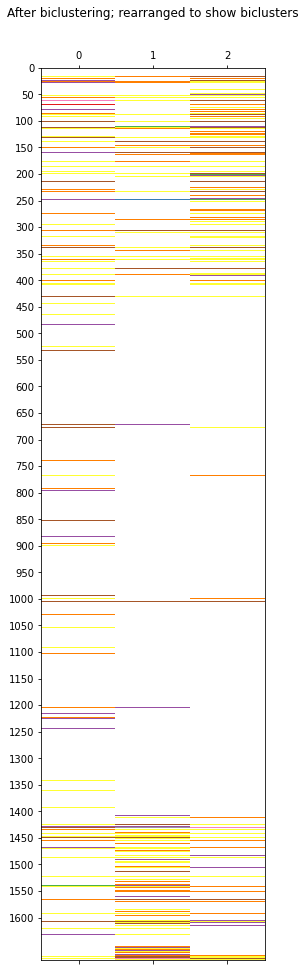

In [95]:
fit_data = scaled_samples[np.argsort(model.row_labels_)]
fit_data = fit_data[:, model.column_labels_]

plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1,aspect="auto")
plt.yticks(np.arange(0, 1650, 50))
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

In [127]:
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(df)
model = SpectralBiclustering(n_clusters=3, random_state=0)
model.fit(scaled_samples)

fit_data = scaled_samples[np.argsort(model.row_labels_)]
fit_data = fit_data[:, model.column_labels_]

plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1,aspect="auto")
plt.yticks(np.arange(0, 1650, 50))
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

<ipython-input-127-f83b3c6e2c54>:9: RuntimeWarning: invalid value encountered in power
  plt.matshow(np.power(fit_data, 0.01), cmap=plt.cm.Set1,aspect="auto")


In [129]:
np.argsort(model.row_labels_)

array([   0, 1124, 1123, ..., 1103,   93,  731], dtype=int64)

Group                   NCT00003896-1  NCT00005908-1  NCT00006184-1  \
Disease code                                                          
10000060                         0.00           0.00       0.000000   
10000636                         0.00           0.00       0.000000   
10001497                         0.00           0.00       0.000000   
10001551                         0.00           0.00       0.000000   
10001675                         0.00           0.00       0.000000   
10002167                         0.00           0.00       0.000000   
10002899                         0.00           0.00       0.000000   
10003012                         0.00           0.00       0.000000   
10003481                         0.00           0.00       0.000000   
10003504                         0.00           0.00       0.000000   
10003673                         0.00           0.00       0.000000   
10003674                         0.00           0.00       0.000000   
10005047                         0.00           0.00       0.000000   
10005265                         0.00           0.00       0.000000   
10005329                         0.00           0.00       0.000000   
10005359                         0.00           0.00       0.000000   
10005364                         0.00           0.00       0.000000   
10005630                         0.00           0.00       0.000000   
10005778                         0.00           0.00       0.000000   
10005886                         0.00           0.00       0.000000   
10006002                         0.00           3.33       0.000000   
10006259                         0.00           0.00       0.000000   
10006440                         0.00           0.00       0.000000   
10006504                         0.00           0.00       0.000000   
10006556                         0.00           0.00       0.000000   
10007541                         0.00           0.00       0.000000   
10007612                         0.00           0.00       0.000000   
10007613                         0.00           0.00       0.000000   
10007810                         0.00           0.00       0.000000   
10007839                         0.00           0.00       0.000000   
10008481                         0.00           0.00       0.000000   
10008496                         0.00           0.00       0.000000   
10008661                         0.00           0.00       0.000000   
10009845                         0.00           0.00       0.000000   
10009998                         0.00           0.00       0.000000   
10010000                         0.00           0.00       0.000000   
10010001                         0.00           0.00       0.000000   
10010004                         0.00           0.00       0.000000   
10010276                         0.00           0.00       0.000000   
10011268                         0.00           0.00       0.000000   
10011368                         0.00           0.00       0.000000   
10011655                         0.00           0.00       0.000000   
10011914                         0.00           0.00       0.000000   
10013781                         0.00           0.00       0.000000   
10013786                         0.00           0.00       0.000000   
10013832                         0.00           0.00       0.000000   
10013993                         0.00           0.00       0.000000   
10014020                         0.00           0.00       0.000000   
10014217                         0.00           0.00       0.000000   
10014222                         0.00           0.00       0.000000   
10014383                         0.00           0.00       0.000000   
10014621                         0.00           0.00       0.000000   
10014678                         0.00           0.00       0.000000   
10014698                         0.00           0.00       0.000000   
10015384                

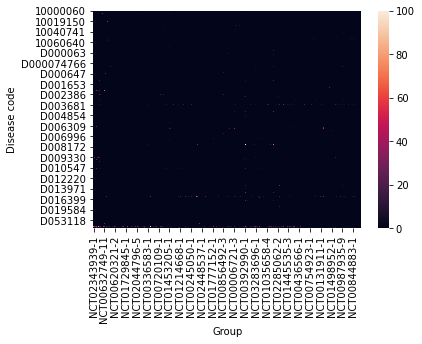

In [123]:
scaled_samples = scaler.fit_transform(drugs)
sns.heatmap(drugs)

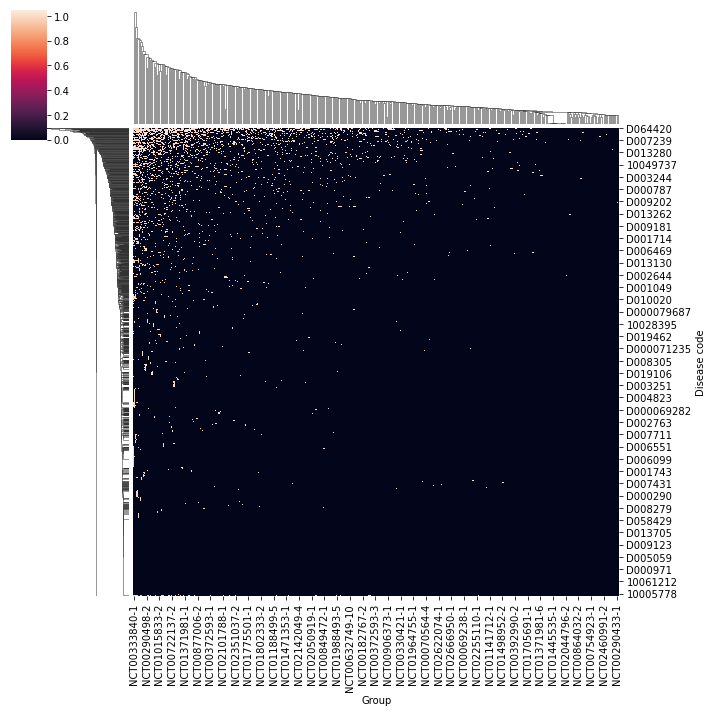

In [112]:
sns.clustermap(np.power(drugs, 0.01))

<ipython-input-119-4aa4832892d6>:1: RuntimeWarning: invalid value encountered in power
  sns.clustermap(np.power(scaled_samples, 0.01))
C:\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


ValueError: The condensed distance matrix must contain only finite values.

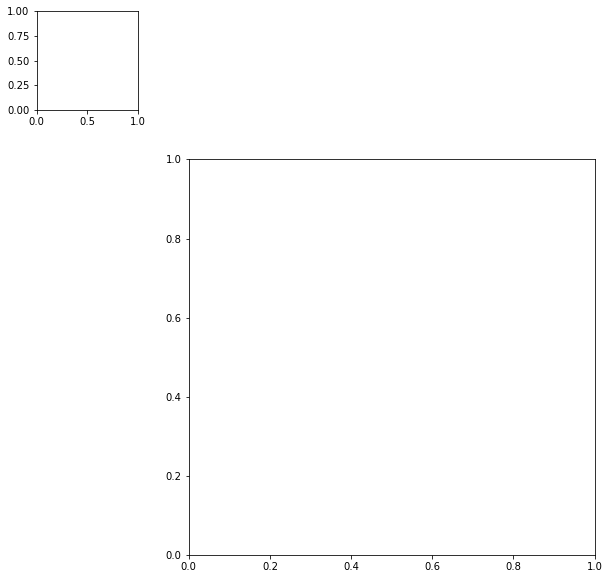

In [119]:
sns.clustermap(np.power(scaled_samples, 0.01))

In [117]:
np.power(scaled_samples, 0.01)

<ipython-input-117-d550d2f07162>:1: RuntimeWarning: invalid value encountered in power
  np.power(scaled_samples, 0.01)


array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 1.02289814,        nan, ...,        nan,        nan,
               nan]])

In [30]:
mesh = D_names[D_names["Disease code"].isin(contiditions)]
mesh = mesh.reset_index(drop=True)

In [31]:
import pickle
with open('meshdict.pickle', 'rb') as handle:
    d = pickle.load(handle)

In [54]:
for i in d.items():
    print(i[1][1][:3])

D03
D02
J01
L01
A01
C23
C26
C04
A02
A08
B04
C16
C16
C16
C16
C16
D23
A13
D27
D27
D27
C13
M01
I01
E04
C13
C13
E04
E04
C13
C01
E04
C13
C13
F04
D08
C13
C01
C01
D02
F02
G01
L01
E06
B01
N02
N03
B01
B01
A11
C17
C17
B01
G01
A08
N06
F01
N06
N06
N06
N06
N06
N06
G07
G14
N03
J01
J01
F01
A11
A11
A11
I03
F01
E01
G07
F04
F01
F02
F01
F01
F02
I01
E02
I01
F01
F01
G05
G04
G04
H01
M01
M01
G11
G07
B01
N04
I02
B01
H01
D12
M01
M01
N03
I03
F01
C18
N03
N02
E01
G07
D10
J01
F03
F01
G07
J01
E01
A11
B04
A11
E07
C20
E01
H02
C23
E05
E02
E05
F04
F01
C18
G07
E01
E01
C26
E07
D27
C26
E01
D02
F03
I01
I01
F04
F04
I01
F03
F01
E05
F02
E02
E02
E02
E05
N04
E05
K01
N04
L01
D12
D23
D27
E05
F01
G05
D13
G16
F03
N04
C23
B01
M01
J01
F02
N03
M01
G07
N04
N01
D12
D12
A11
B01
F01
F01
D12
N01
D12
D08
N04
D12
D12
D12
D12
D12
D12
D12
D12
D12
D12
D12
A12
A12
F03
D27
F03
D12
D12
I01
L01
G16
G07
D27
A11
N03
B03
V02
Z01
F03
N01
N02
F03
N02
D12
N01
F03
F03
F02
D03
B01
D02
I01
M01
B01
B01
B01
G16
F02
D10
B01
H01
I01
B01
D12
D02
D12
B01
D02
D02


D02
D08
D02
D04
D04
D02
D08
D09
D09
D08
D09
D02
D08
D02
D08
F01
A02
C06
B03
B03
B03
C05
E06
D08
G02
C18
C18
C18
C12
C08
D01
D02
D02
D02
D03
D01
D01
B03
C01
C17
A10
D08
D02
D02
E01
A08
C09
E02
H01
C01
B01
D03
D03
D03
C05
C16
C10
D02
C05
A02
A02
D03
D08
A05
D02
D02
D05
D02
C04
D20
F01
D05
D01
C01
B03
C01
B03
B03
B03
C01
C01
C01
D03
D05
G04
E05
E06
E02
G07
D12
E05
C23
D12
C23
D03
D12
D03
G02
D08
D08
D02
C14
G16
G14
G07
F01
C19
D03
D12
D03
D08
B04
C04
C04
C04
E04
A04
C04
C04
C04
C04
C04
D03
D03
D08
D03
D03
D03
D03
D08
D03
D03
D08
D08
D08
D03
B04
C01
C01
B04
B04
B04
D08
D08
D08
D08
D03
C23
G02
D27
C10
D02
A10
C17
F03
D27
D26
E02
E02
E02
E02
E02
E02
E02
E02
E02
E02
M01
N02
A05
C13
C01
M01
F01
H02
F04
F04
M01
M01
I01
D04
A06
C19
E01
D06
C04
C19
C19
C19
C04
A06
C12
A06
C04
E04
D27
D27
D27
D27
A08
D27
D03
D06
D12
C10
G01
M01
J01
B01
D12
G02
B03
C23
D26
D20
H02
D02
F01
F03
F01
C06
A08
D27
Z01
C15
D03
Z01
Z01
Z01
Z01
Z01
Z01
C01
B04
C01
B04
E02
F02
C15
D09
B01
B01
E01
E01
N05
M01
M01
C10
G02
E01


D06
A10
C22
C01
C16
B01
A05
C12
A02
A02
C01
C10
C10
C10
C10
C10
C10
C10
C10
D04
D02
A02
C05
D03
E04
C12
G05
C08
D04
A14
A11
A10
D02
L01
D08
D02
D05
B04
D04
G11
D04
B04
C01
B04
B04
C05
E07
E07
N06
E05
E05
E05
D12
D01
D04
D03
D03
D04
D03
D03
D03
D03
D02
C25
K01
D10
C23
B03
C01
C01
B03
C01
C17
C01
C17
C17
C01
B01
D02
D02
C13
A11
B01
D12
E01
G04
E01
G09
A11
E01
A11
G09
A11
A11
C04
C14
D02
D02
C04
G04
D12
D02
F01
B03
B03
C01
D02
D03
M01
C06
C06
C06
C04
C06
C06
C06
C04
C06
C06
C06
C06
A03
E04
E01
E04
A03
C10
D03
D08
G02
D02
D04
F02
E06
G07
Z01
D04
D08
D02
D04
D04
D04
D06
D06
D27
D27
D04
G08
E05
E05
D03
D03
D02
D02
D02
D02
D02
D08
D08
D02
D02
D03
D02
D02
D02
K01
K01
K01
K01
K01
K01
K01
D03
D04
D10
D02
D03
D02
Z01
D04
A02
A04
M01
I01
F04
D02
F04
D02
D02
D03
D02
D03
D02
D02
D02
D02
D02
D02
D02
D02
D02
D02
D02
D02
D02
D04
D02
D02
D02
D03
D08
D02
D02
D04
D02
D03
D04
D03
D03
D02
D03
D02
B03
B01
K01
D02
B01
B01
A11
C19
F01
Z01
Z01
I01
D01
A09
E02
E02
C19
G16
E05
D02
G07
G07
G07
G07
G05
C17
C01
E02


IndexError: list index out of range

In [64]:
for group in range(mesh.shape[0]):
    if (mesh.loc[group,"Disease code"]).startswith("D"):
#         print(d[mesh.loc[group,"Disease code"]][1][:-4])
        for item in d.items():
            if d[mesh.loc[group,"Disease code"]][1][:-4] in item[1]:
                mesh.loc[group,"Parent"] = item[1][0]
#             if len(d[mesh.loc[group,"Disease code"]][1][:-4]) > 3:
            if d[mesh.loc[group,"Disease code"]][1][:3] in item[1]:
                mesh.loc[group,"Root"] = item[1][0]
#             else:
#                 mesh.loc[group,"Root"] = item[1][0]
    else:
        mesh.loc[group,"Parent"] = "Not mesh"


In [65]:
mesh

D_Name Disease code  \
0                alkaline phosphatase increased     10001675   
1                                     bone pain     10006002   
2                          creatinine increased     10011368   
3                                   esophagitis     10015461   
4                                          fall     10016173   
5                                 gingival pain     10018286   
6                                 gum infection     10018784   
7                         haptoglobin decreased     10019150   
8                                hypomagnesemia     10021028   
9   infections and infestations - other specify     10021881   
10                               joint effusion     10023215   
11                            pain in extremity     10033425   
12                     platelet count decreased     10035528   
13                          rash maculo-papular     10037868   
14                                       sepsis     10040047   
15                 small intestinal obstruction     10041101   
16                   white blood cell decreased     10049182   
17                  ejection fraction decreased     10050528   
18                          abdominal infection     10056519   
19                               lung infection     10061229   
20                  generalized muscle weakness     10062572   
21                                      abdomen      D000005   
22             mental status and dementia tests   D000073216   
23                          infertility clinics   D000080104   
24                                   angioedema      D000799   
25                                     anorexia      D000855   
26                                      hypoxia      D000860   
27                               antidiarrheals      D000930   
28                                      aphasia      D001037   
29                                      ascites      D001201   
30                             bronchopneumonia      D001996   
31                                 bronchoscopy      D001999   
32                                     gliporal      D002026   
33                    right bundle-branch block      D002037   
34                                     bursitis      D002062   
35                                   chest pain      D002637   
36                                cholesteatoma      D002781   
37                              chorioretinitis      D002825   
38                                  chylothorax      D002916   
39                                     clavicle      D002968   
40                                  clostridium      D003013   
41                             cluster headache      D003027   
42                   solitary pulmonary nodules      D003074   
43                           ulcerative colitis      D003093   
44                    pseudoobstruction colonic      D003112   
45                                         coma      D003128   
46                         compartment syndrome      D003161   
47                                    confusion      D003221   
48                        conjunctival diseases      D003229   
49                                 constipation      D003248   
50                                     stenosis      D003251   
51                               contrast media      D003287   
52                                    contusion      D003288   
53                               astasia-abasia      D003291   
54                                        cough      D003371   
55                                    dysphagia      D003680   
56                    clostridium enterocolitis      D004761   
57                                    epistaxis      D004844   
58                         unknown origin fever      D005335   
59                                    gastritis      D005756   
60                              gastroenteritis      D005759   
61                                     headache      D006261   
62       